# UEB Braille to MathML Translation Analysis

This notebook analyzes the results from translating **UEB braille to MathML** using Gemini 3 Pro.

**File analyzed:** `from-UEB-gemini-3-pro-preview-192exs-2160tests.txt`

**Configuration:**
- Model: gemini-3-pro-preview
- Number of examples: 192
- Number of tests: 2160

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Force reload of analysis_utils to get latest version
import importlib
import analysis_utils
importlib.reload(analysis_utils)

from analysis_utils import (
    parse_result_file,
    create_dataframe_from_results,
    compute_accuracy_by_bins,
    compute_accuracy_by_feature,
    print_summary_statistics
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Load and Parse Data

In [16]:
# Parse the result file
results = parse_result_file('../results/from-UEB-gemini-3-pro-preview-192exs-2160tests.txt')
print(f"Loaded {len(results)} translation results")

# Convert to DataFrame with computed metrics
df = create_dataframe_from_results(results, input_is_braille=True)

# Display first few rows
df.head(10)

,is_correct,input,expected,computed,input_length,expected_length,computed_length,braille_length,expected_mathml_elements,computed_mathml_elements,expected_has_frac,expected_has_sup,expected_has_sub,expected_has_sqrt,expected_has_matrix,expected_num_elements,expected_nesting_depth
0,True,⠋⠐⠣⠞⠐⠜⠀⠐⠶⠀⠁⠃⠰⠔⠞,"<math><mrow><mi>f</mi><mo stretchy=""false"">(</...",<math><mi>f</mi><mo>(</mo><mi>t</mi><mo>)</mo>...,15,153,106,15,11,10,False,True,False,False,False,11,4
1,True,⠛⠐⠣⠞⠐⠜⠀⠐⠶⠀⠁⠃⠰⠔⠞⠐⠖⠉,"<math><mrow><mi>g</mi><mo stretchy=""false"">(</...",<math><mi>g</mi><mo>(</mo><mi>t</mi><mo>)</mo>...,18,173,126,18,13,12,False,True,False,False,False,13,4
2,True,⠼⠁⠚,<math><mn>10</mn></math>,<math><mn>10</mn></math>,3,24,24,3,2,2,False,False,False,False,False,2,2
3,True,⠼⠃⠐⠖⠼⠉⠀⠐⠶⠀⠼⠑⠒,<math><mrow><mn>2</mn><mo>+</mo><mn>3</mn><mo>...,<math><mn>2</mn><mo>+</mo><mn>3</mn><mo>=</mo>...,13,92,73,13,8,7,False,False,False,False,False,8,3
4,True,⠼⠃,<math><mn>2</mn></math>,<math><mn>2</mn></math>,2,23,23,2,2,2,False,False,False,False,False,2,2
5,False,⠼⠃⠐⠲⠼⠉⠀⠐⠶⠀⠼⠋⠲,<math><mrow><mn>2</mn><mo>⋅</mo><mn>3</mn><mo>...,<math><mn>2</mn><mo>&#xB7;</mo><mn>3</mn><mo>=...,13,92,78,13,8,7,False,False,False,False,False,8,3
6,True,⠰⠰⠰⠋⠒⠀⠠⠃⠀⠳⠕⠀⠠⠉⠂⠀⠰⠄,<math><mrow><mi>f</mi><mo>:</mo><mi>B</mi><mo ...,<math><mi>f</mi><mo>:</mo><mi>B</mi><mo>&#x219...,18,124,80,18,8,7,False,False,False,False,False,8,3
7,True,⠐⠣⠋⠐⠴⠛⠐⠜⠐⠣⠭⠐⠜⠀⠐⠶⠀⠋⠐⠣⠛⠐⠣⠭⠐⠜⠐⠜⠲,"<math><mrow><mo stretchy=""false"">(</mo><mi>f</...",<math><mo>(</mo><mi>f</mi><mo>&#x2218;</mo><mi...,29,338,190,29,19,18,False,False,False,False,False,19,3
8,True,⠰⠛,<math><mi>g</mi></math>,<math><mi>g</mi></math>,2,23,23,2,2,2,False,False,False,False,False,2,2
9,True,⠰⠋,<math><mi>f</mi></math>,<math><mi>f</mi></math>,2,23,23,2,2,2,False,False,False,False,False,2,2


## 2. Overall Summary Statistics

In [17]:
print_summary_statistics(df, "UEB to MathML Translation Results")


             UEB to MathML Translation Results              

Total translations: 2080
Correct: 1498
Incorrect: 582
Overall accuracy: 72.02%

                     Length Statistics                      
------------------------------------------------------------
       input_length  expected_length  computed_length
count   2080.000000      2080.000000      2080.000000
mean      20.720673       170.907212       114.350000
std       30.040623       212.291856       127.836267
min        1.000000        23.000000        13.000000
25%        6.000000        67.000000        46.000000
50%       13.000000       112.500000        79.000000
75%       25.000000       202.000000       140.000000
max      525.000000      3476.000000      2077.000000


## 3. Length-Based Analysis

### 3.1 Accuracy by Braille Input Length

In [18]:
# Define custom bins for braille length
braille_bins = [0, 10, 20, 30, 50, 100, 200, 1000]

# Use helper function to compute accuracy by bins
accuracy_by_braille_length, braille_bin_series = compute_accuracy_by_bins(
    df, 'braille_length', bins=braille_bins, bin_column_name='braille_length_bin'
)
df['braille_length_bin'] = braille_bin_series

print("\nAccuracy by Braille Input Length:")
print(accuracy_by_braille_length)


Accuracy by Braille Input Length:
  braille_length_bin  correct  total  accuracy  accuracy_pct
0     (-0.001, 10.0]      725    850    0.8529         85.29
1       (10.0, 20.0]      432    565    0.7646         76.46
2       (20.0, 30.0]      208    301    0.6910         69.10
3       (30.0, 50.0]       96    210    0.4571         45.71
4      (50.0, 100.0]       30    117    0.2564         25.64
5     (100.0, 200.0]        7     30    0.2333         23.33
6    (200.0, 1000.0]        0      7    0.0000          0.00


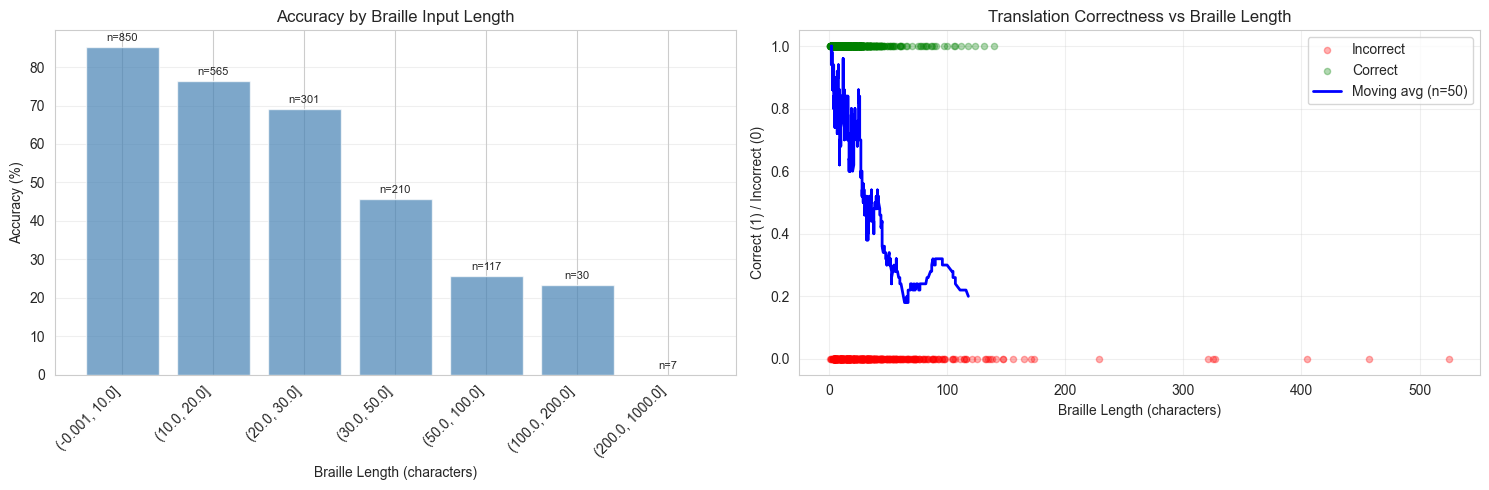

In [19]:
# Visualize accuracy by braille length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart of accuracy by length bin
bins_data = accuracy_by_braille_length.reset_index()
bins_data['bin_label'] = bins_data['braille_length_bin'].astype(str)
ax1.bar(range(len(bins_data)), bins_data['accuracy_pct'], color='steelblue', alpha=0.7)
ax1.set_xticks(range(len(bins_data)))
ax1.set_xticklabels(bins_data['bin_label'], rotation=45, ha='right')
ax1.set_xlabel('Braille Length (characters)')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy by Braille Input Length')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, row in enumerate(bins_data.itertuples()):
    ax1.text(i, row.accuracy_pct + 1, f"n={row.total}", ha='center', va='bottom', fontsize=8)

# Scatter plot with trend line
correct = df[df['is_correct']]
incorrect = df[~df['is_correct']]

ax2.scatter(incorrect['braille_length'], [0]*len(incorrect), alpha=0.3, c='red', label='Incorrect', s=20)
ax2.scatter(correct['braille_length'], [1]*len(correct), alpha=0.3, c='green', label='Correct', s=20)

# Add moving average
df_sorted = df.sort_values('braille_length')
window_size = 50
rolling_accuracy = df_sorted['is_correct'].rolling(window=window_size, center=True).mean()
ax2.plot(df_sorted['braille_length'], rolling_accuracy, 'b-', linewidth=2, label=f'Moving avg (n={window_size})')

ax2.set_xlabel('Braille Length (characters)')
ax2.set_ylabel('Correct (1) / Incorrect (0)')
ax2.set_title('Translation Correctness vs Braille Length')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/from_ueb/accuracy_by_braille_length.svg', format='svg', bbox_inches='tight')
plt.show()

### 3.2 Accuracy by Expected MathML Length

In [20]:
# Define bins for MathML length
mathml_bins = [0, 50, 100, 200, 400, 800, 5000]

# Use helper function to compute accuracy by bins
accuracy_by_mathml_length, mathml_bin_series = compute_accuracy_by_bins(
    df, 'expected_length', bins=mathml_bins, bin_column_name='mathml_length_bin'
)
df['mathml_length_bin'] = mathml_bin_series

print("\nAccuracy by Expected MathML Length:")
print(accuracy_by_mathml_length)


Accuracy by Expected MathML Length:
  mathml_length_bin  correct  total  accuracy  accuracy_pct
0    (-0.001, 50.0]      263    324    0.8117         81.17
1     (50.0, 100.0]      500    605    0.8264         82.64
2    (100.0, 200.0]      461    623    0.7400         74.00
3    (200.0, 400.0]      226    376    0.6011         60.11
4    (400.0, 800.0]       41    117    0.3504         35.04
5   (800.0, 5000.0]        7     35    0.2000         20.00


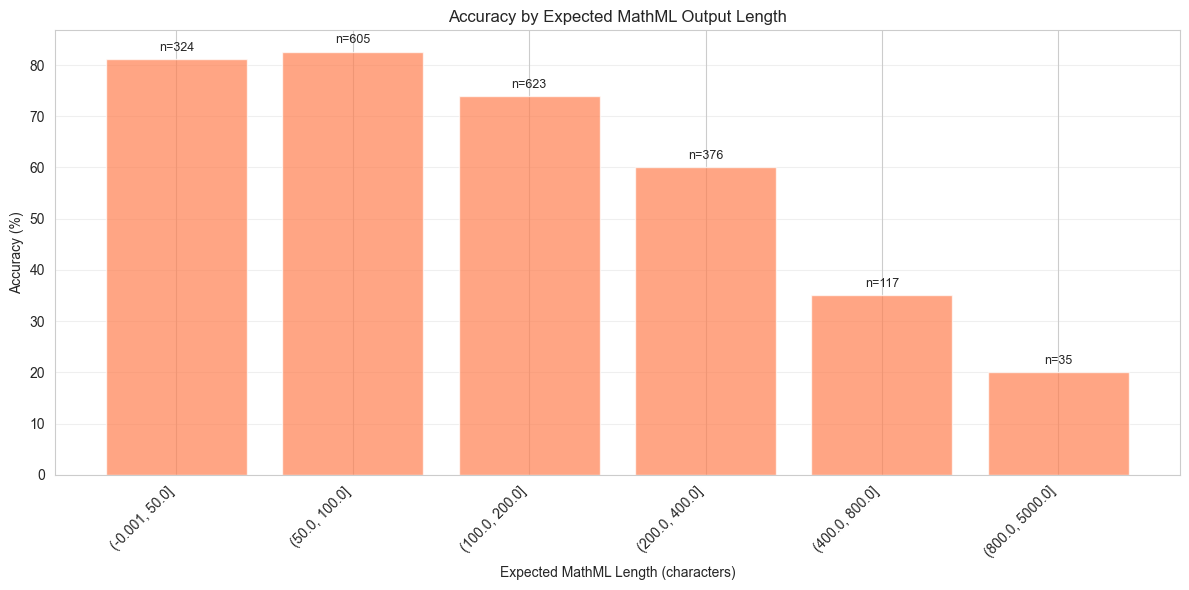

In [21]:
# Visualize accuracy by MathML length
fig, ax = plt.subplots(figsize=(12, 6))

bins_data = accuracy_by_mathml_length.reset_index()
bins_data['bin_label'] = bins_data['mathml_length_bin'].astype(str)
bars = ax.bar(range(len(bins_data)), bins_data['accuracy_pct'], color='coral', alpha=0.7)
ax.set_xticks(range(len(bins_data)))
ax.set_xticklabels(bins_data['bin_label'], rotation=45, ha='right')
ax.set_xlabel('Expected MathML Length (characters)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Expected MathML Output Length')
ax.grid(axis='y', alpha=0.3)

# Add labels
for i, row in enumerate(bins_data.itertuples()):
    ax.text(i, row.accuracy_pct + 1, f"n={row.total}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('figures/from_ueb/accuracy_by_mathml_length.svg', format='svg', bbox_inches='tight')
plt.show()

### 3.3 2D Heatmap: Input Length vs Output Length

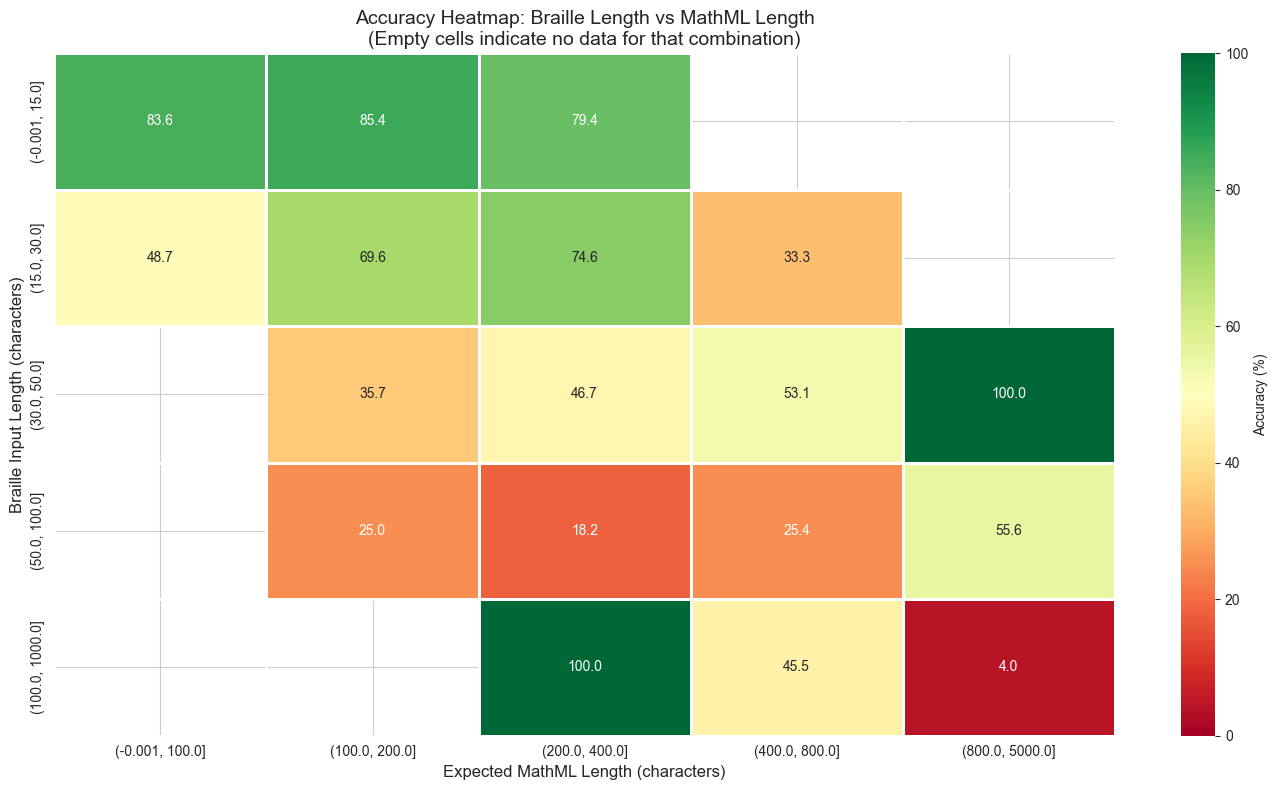

In [22]:
# Create 2D bins
braille_bins_2d = [0, 15, 30, 50, 100, 1000]
mathml_bins_2d = [0, 100, 200, 400, 800, 5000]

df['braille_bin_2d'] = pd.cut(df['braille_length'], bins=braille_bins_2d, include_lowest=True)
df['mathml_bin_2d'] = pd.cut(df['expected_length'], bins=mathml_bins_2d, include_lowest=True)

# Create pivot table for heatmap
pivot = df.groupby(['braille_bin_2d', 'mathml_bin_2d'], observed=True)['is_correct'].agg(['mean', 'count'])
pivot_accuracy = pivot['mean'].unstack(fill_value=np.nan) * 100
pivot_counts = pivot['count'].unstack(fill_value=0)

# Plot heatmap with better NaN handling
fig, ax = plt.subplots(figsize=(14, 8))

# Create annotations that show count and accuracy, or "N/A" for NaN
annot_labels = pivot_accuracy.copy()
for i in range(len(pivot_accuracy.index)):
    for j in range(len(pivot_accuracy.columns)):
        val = pivot_accuracy.iloc[i, j]
        count = pivot_counts.iloc[i, j]
        if pd.isna(val) or count == 0:
            annot_labels.iloc[i, j] = np.nan
        else:
            annot_labels.iloc[i, j] = val

# Plot heatmap
sns.heatmap(pivot_accuracy, annot=annot_labels, fmt='.1f', cmap='RdYlGn',
            vmin=0, vmax=100, cbar_kws={'label': 'Accuracy (%)'},
            linewidths=1, linecolor='white', ax=ax,
            cbar=True, square=False, 
            mask=pivot_accuracy.isna())

ax.set_xlabel('Expected MathML Length (characters)', fontsize=12)
ax.set_ylabel('Braille Input Length (characters)', fontsize=12)
ax.set_title('Accuracy Heatmap: Braille Length vs MathML Length\n(Empty cells indicate no data for that combination)', fontsize=14)
plt.tight_layout()
plt.savefig('figures/from_ueb/heatmap_length_2d.svg', format='svg', bbox_inches='tight')
plt.show()

## 4. MathML Complexity Analysis

### 4.1 Accuracy by MathML Features

In [23]:
print("Sample counts per cell:")
print(pivot_counts)

Sample counts per cell:
mathml_bin_2d    (-0.001, 100.0]  (100.0, 200.0]  (200.0, 400.0]  \
braille_bin_2d                                                     
(-0.001, 15.0]               890             274              34   
(15.0, 30.0]                  39             303             173   
(30.0, 50.0]                   0              42             135   
(50.0, 100.0]                  0               4              33   
(100.0, 1000.0]                0               0               1   

mathml_bin_2d    (400.0, 800.0]  (800.0, 5000.0]  
braille_bin_2d                                    
(-0.001, 15.0]                0                0  
(15.0, 30.0]                  3                0  
(30.0, 50.0]                 32                1  
(50.0, 100.0]                71                9  
(100.0, 1000.0]              11               25  


In [24]:
# Analyze accuracy by presence of different MathML features
features = ['expected_has_frac', 'expected_has_sup', 'expected_has_sub', 
            'expected_has_sqrt', 'expected_has_matrix']

feature_analysis = {}
for feature in features:
    if feature in df.columns:
        feature_analysis[feature] = compute_accuracy_by_feature(df, feature)

# Display results
for feature, stats in feature_analysis.items():
    print(f"\n{feature}:")
    print(stats)


expected_has_frac:
   expected_has_frac  correct_count  total_count  accuracy  accuracy_pct
0              False           1223         1547    0.7906         79.06
1               True            275          533    0.5159         51.59

expected_has_sup:
   expected_has_sup  correct_count  total_count  accuracy  accuracy_pct
0             False           1184         1634    0.7246         72.46
1              True            314          446    0.7040         70.40

expected_has_sub:
   expected_has_sub  correct_count  total_count  accuracy  accuracy_pct
0             False           1406         1896    0.7416         74.16
1              True             92          184    0.5000         50.00

expected_has_sqrt:
   expected_has_sqrt  correct_count  total_count  accuracy  accuracy_pct
0              False           1373         1876    0.7319         73.19
1               True            125          204    0.6127         61.27

expected_has_matrix:
   expected_has_matrix  correc

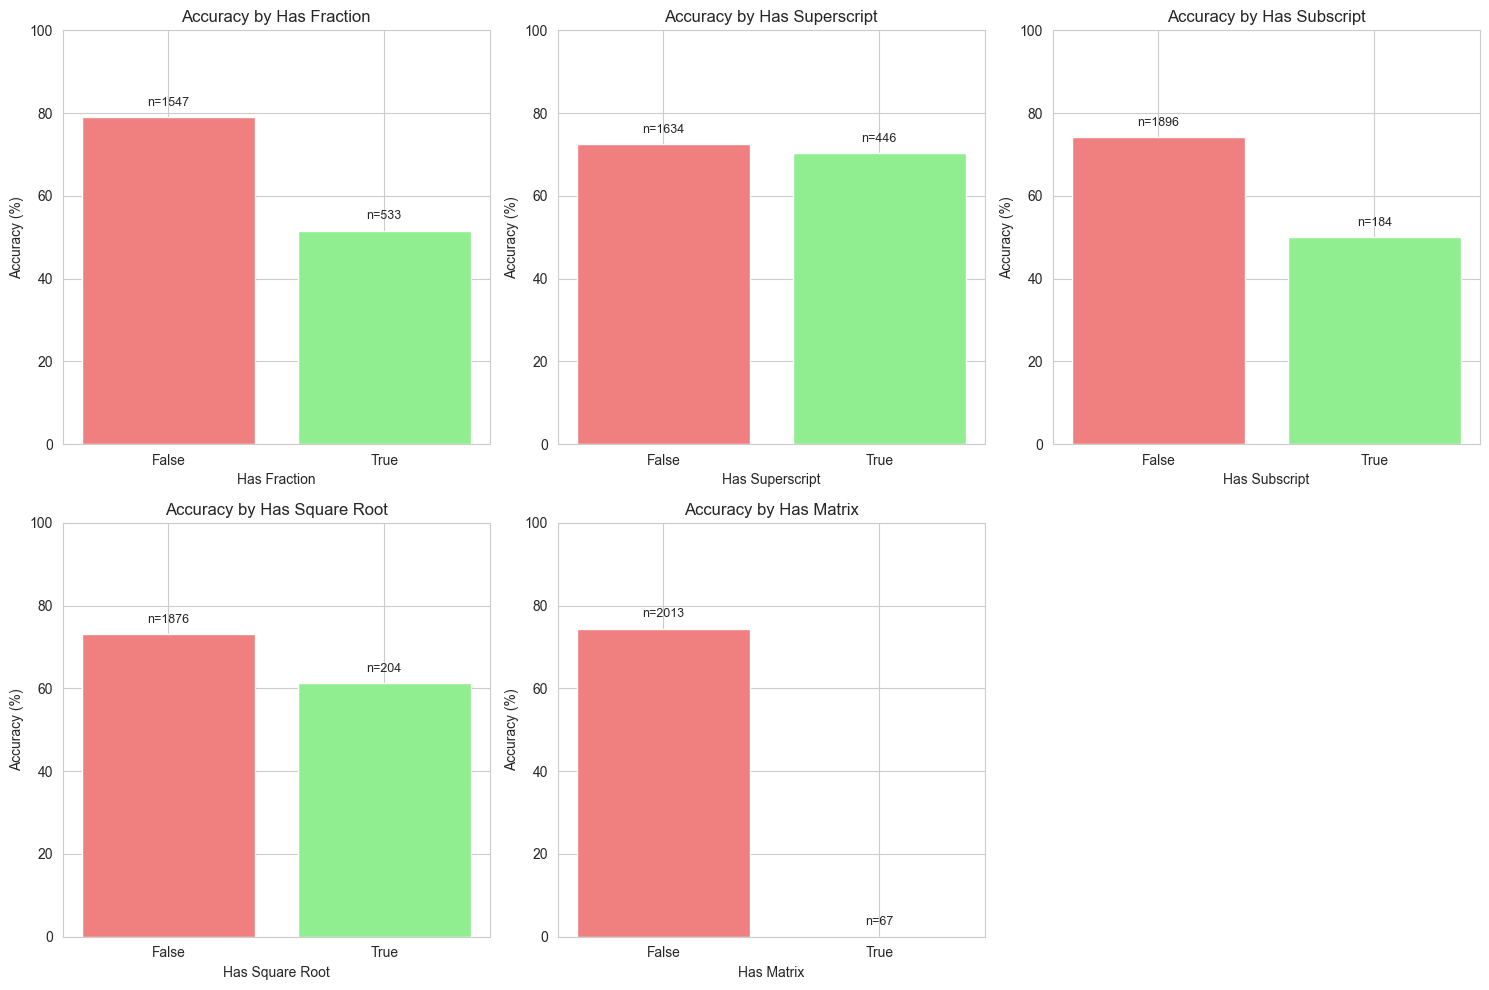

In [25]:
# Visualize accuracy by features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

feature_labels = {
    'expected_has_frac': 'Has Fraction',
    'expected_has_sup': 'Has Superscript',
    'expected_has_sub': 'Has Subscript',
    'expected_has_sqrt': 'Has Square Root',
    'expected_has_matrix': 'Has Matrix'
}

for idx, (feature, label) in enumerate(feature_labels.items()):
    if feature in df.columns and idx < len(axes):
        stats = feature_analysis[feature]
        
        bars = axes[idx].bar(stats[feature].astype(str), stats['accuracy_pct'], 
                            color=['lightcoral', 'lightgreen'])
        axes[idx].set_xlabel(label)
        axes[idx].set_ylabel('Accuracy (%)')
        axes[idx].set_title(f'Accuracy by {label}')
        axes[idx].set_ylim(0, 100)
        
        # Add count labels
        for i, row in enumerate(stats.itertuples()):
            axes[idx].text(i, row.accuracy_pct + 2, f"n={row.total_count}", 
                          ha='center', va='bottom', fontsize=9)

# Hide unused subplot
if len(feature_labels) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.savefig('figures/from_ueb/accuracy_by_features.svg', format='svg', bbox_inches='tight')
plt.show()

### 4.2 Accuracy by MathML Nesting Depth

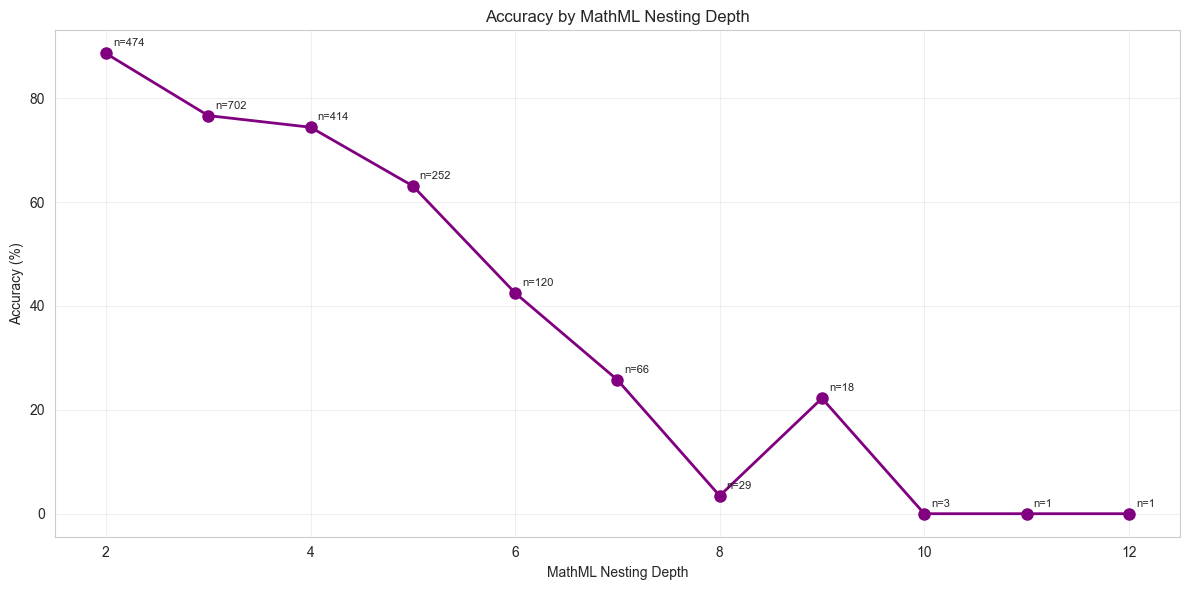

In [26]:
# Analyze by nesting depth
if 'expected_nesting_depth' in df.columns:
    depth_analysis = df.groupby('expected_nesting_depth').agg({
        'is_correct': ['sum', 'count', 'mean']
    }).round(4)
    depth_analysis.columns = ['correct', 'total', 'accuracy']
    depth_analysis['accuracy_pct'] = (depth_analysis['accuracy'] * 100).round(2)
    
    print("\nAccuracy by MathML Nesting Depth:")
    print(depth_analysis)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    depth_data = depth_analysis.reset_index()
    ax.plot(depth_data['expected_nesting_depth'], depth_data['accuracy_pct'], 
           marker='o', linewidth=2, markersize=8, color='purple')
    ax.set_xlabel('MathML Nesting Depth')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy by MathML Nesting Depth')
    ax.grid(alpha=0.3)
    
    # Add sample size labels
    for _, row in depth_data.iterrows():
        ax.annotate(f"n={int(row['total'])}", 
                   xy=(row['expected_nesting_depth'], row['accuracy_pct']),
                   xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('figures/from_ueb/accuracy_by_nesting_depth.svg', format='svg', bbox_inches='tight')
    plt.show()

## 5. Distribution Analysis

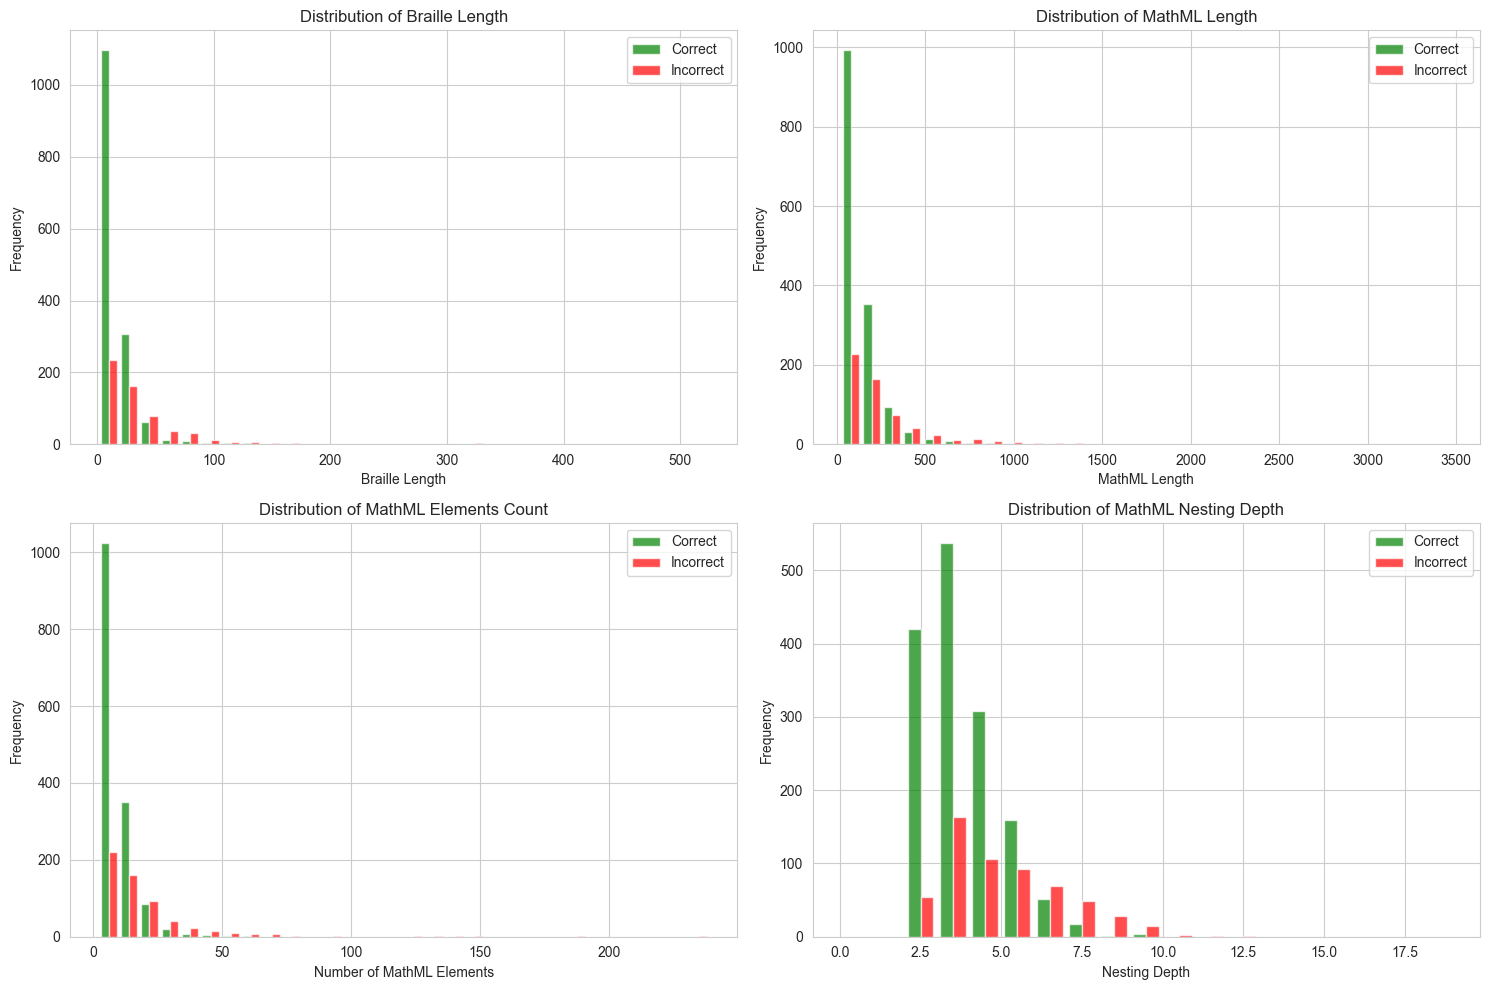

In [27]:
# Compare distributions of correct vs incorrect translations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

correct_df = df[df['is_correct']]
incorrect_df = df[~df['is_correct']]

# Braille length distribution
axes[0, 0].hist([correct_df['braille_length'], incorrect_df['braille_length']], 
                bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
axes[0, 0].set_xlabel('Braille Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Braille Length')
axes[0, 0].legend()

# MathML length distribution
axes[0, 1].hist([correct_df['expected_length'], incorrect_df['expected_length']], 
                bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
axes[0, 1].set_xlabel('MathML Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of MathML Length')
axes[0, 1].legend()

# Number of elements distribution
if 'expected_num_elements' in df.columns:
    axes[1, 0].hist([correct_df['expected_num_elements'], incorrect_df['expected_num_elements']], 
                    bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
    axes[1, 0].set_xlabel('Number of MathML Elements')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of MathML Elements Count')
    axes[1, 0].legend()

# Nesting depth distribution
if 'expected_nesting_depth' in df.columns:
    axes[1, 1].hist([correct_df['expected_nesting_depth'], incorrect_df['expected_nesting_depth']], 
                    bins=range(0, 20), label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
    axes[1, 1].set_xlabel('Nesting Depth')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of MathML Nesting Depth')
    axes[1, 1].legend()

plt.tight_layout()
plt.savefig('figures/from_ueb/distribution_analysis.svg', format='svg', bbox_inches='tight')
plt.show()